## 1. Introduction
<p><img src="https://assets.datacamp.com/production/project_1197/img/google_play_store.png" alt="Google Play logo"></p>
<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>

## 1. Introduction

<p>Mobile apps are everywhere. They are easy to create and can be very lucrative from the business standpoint. Specifically, Android is expanding as an operating system and has captured more than 74% of the total market<sup><a href="https://www.statista.com/statistics/272698/global-market-share-held-by-mobile-operating-systems-since-2009">[1]</a></sup>. </p>
<p>The Google Play Store apps data has enormous potential to facilitate data-driven decisions and insights for businesses. In this notebook, we will analyze the Android app market by comparing ~10k apps in Google Play across different categories. We will also use the user reviews to draw a qualitative comparision between the apps.</p>
<p>The dataset you will use here was scraped from Google Play Store in September 2018 and was published on <a href="https://www.kaggle.com/lava18/google-play-store-apps">Kaggle</a>. Here are the details: <br>
<br></p>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/apps.csv</b></div>
This file contains all the details of the apps on Google Play. There are 9 features that describe a given app.
<ul>
    <li><b>App:</b> Name of the app</li>
    <li><b>Category:</b> Category of the app. Some examples are: ART_AND_DESIGN, FINANCE, COMICS, BEAUTY etc.</li>
    <li><b>Rating:</b> The current average rating (out of 5) of the app on Google Play</li>
    <li><b>Reviews:</b> Number of user reviews given on the app</li>
    <li><b>Size:</b> Size of the app in MB (megabytes)</li>
    <li><b>Installs:</b> Number of times the app was downloaded from Google Play</li>
    <li><b>Type:</b> Whether the app is paid or free</li>
    <li><b>Price:</b> Price of the app in US$</li>
    <li><b>Last Updated:</b> Date on which the app was last updated on Google Play </li>

</ul>
</div>
<div style="background-color: #efebe4; color: #05192d; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/user_reviews.csv</b></div>
This file contains a random sample of 100 <i>[most helpful first](https://www.androidpolice.com/2019/01/21/google-play-stores-redesigned-ratings-and-reviews-section-lets-you-easily-filter-by-star-rating/)</i> user reviews for each app. The text in each review has been pre-processed and passed through a sentiment analyzer.
<ul>
    <li><b>App:</b> Name of the app on which the user review was provided. Matches the `App` column of the `apps.csv` file</li>
    <li><b>Review:</b> The pre-processed user review text</li>
    <li><b>Sentiment Category:</b> Sentiment category of the user review - Positive, Negative or Neutral</li>
    <li><b>Sentiment Score:</b> Sentiment score of the user review. It lies between [-1,1]. A higher score denotes a more positive sentiment.</li>

</ul>
</div>
<p>From here on, it will be your task to explore and manipulate the data until you are able to answer the three questions described in the instructions panel.<br></p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

# Data Gathering

In [2]:
df = pd.read_csv("datasets/apps.csv")
reviews = pd.read_csv("datasets/user_reviews.csv")

# Data Assesment

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   object 
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(1), object(5)
memory usage: 679.3+ KB


In [4]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 64295 non-null  object 
 1   Review              37427 non-null  object 
 2   Sentiment Category  37432 non-null  object 
 3   Sentiment Score     37432 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [5]:
df.duplicated().value_counts()

False    9659
dtype: int64

### Assesment Summary
* `Installs` column in an object instead of an int
* Numbers at `Installs` column have a "+" at the end. (e.g 10,000+")
* Numbers at `Installs` column have a coma. (e.g. 10,000)

# Data Cleaning

### Define
* Removing the plus sign and the coma from each number in `Installs`

### Code

In [6]:
unwanted_chars = ["+", ","]
for char in unwanted_chars:
    df.Installs = df.Installs.apply(lambda x: x.replace(char, ""))

### Test

In [7]:
df.Installs.head()

0       10000
1      500000
2     5000000
3    50000000
4      100000
Name: Installs, dtype: object

## Define
* Change `Installs` datatype to int

### Code

In [8]:
df.Installs = df.Installs.astype(int)

### Test

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   int32  
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int32(1), int64(1), object(4)
memory usage: 641.5+ KB


### Store cleaned data frame into `apps.csv` and work with it from now forward

In [10]:
df.to_csv("apps.csv", index = False)

In [11]:
apps = pd.read_csv("apps.csv")

In [12]:
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9659 entries, 0 to 9658
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   App           9659 non-null   object 
 1   Category      9659 non-null   object 
 2   Rating        8196 non-null   float64
 3   Reviews       9659 non-null   int64  
 4   Size          8432 non-null   float64
 5   Installs      9659 non-null   int64  
 6   Type          9659 non-null   object 
 7   Price         9659 non-null   float64
 8   Last Updated  9659 non-null   object 
dtypes: float64(3), int64(2), object(4)
memory usage: 679.3+ KB


# Answering Questions

Answering the first question:
* Find the number of apps in each category, the average price, and the average rating. Save your answer as a DataFrame `app_category_info`. Your should rename the four columns as: Category, `Number of apps`, `Average price`, `Average rating`.

In [13]:
app_category_info = apps.groupby("Category").agg({"App": "count", "Price": "mean", "Rating":"mean"})

In [14]:
app_category_info.rename(columns={"App": "Number of apps", "Price": "Average price", "Rating": "Average rating"}, inplace = True)

In [15]:
app_category_info.reset_index(inplace = True)

In [16]:
app_category_info

,Category,Number of apps,Average price,Average rating
0,ART_AND_DESIGN,64,0.093281,4.357377
1,AUTO_AND_VEHICLES,85,0.158471,4.190411
2,BEAUTY,53,0.000000,4.278571
3,BOOKS_AND_REFERENCE,222,0.539505,4.344970
4,BUSINESS,420,0.417357,4.098479
5,COMICS,56,0.000000,4.181481
6,COMMUNICATION,315,0.263937,4.121484
7,DATING,171,0.160468,3.970149
8,EDUCATION,119,0.150924,4.364407
9,ENTERTAINMENT,102,0.078235,4.135294


Answering the second question
* Find the top 10 free FINANCE apps having the highest average sentiment score. Save your answer as a DataFrame `top_10_user_feedback`. Your answer should have exactly 10 rows and two columns named: `App` and `Sentiment Score`, where the average `Sentiment Score` is sorted from highest to lowest.

In [17]:
merged_df = reviews.merge(apps, how = "left", on = "App")

In [18]:
reviews

,App,Review,Sentiment Category,Sentiment Score
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25
2,10 Best Foods for You,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40
4,10 Best Foods for You,Best idea us,Positive,1.00
...,...,...,...,...
64290,Houzz Interior Design Ideas,NaN,NaN,NaN
64291,Houzz Interior Design Ideas,NaN,NaN,NaN
64292,Houzz Interior Design Ideas,NaN,NaN,NaN
64293,Houzz Interior Design Ideas,NaN,NaN,NaN


In [19]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   App                 64295 non-null  object 
 1   Review              37427 non-null  object 
 2   Sentiment Category  37432 non-null  object 
 3   Sentiment Score     37432 non-null  float64
dtypes: float64(1), object(3)
memory usage: 2.0+ MB


In [20]:
top_10_user_feedback = reviews.merge(apps, how = "left", on = "App")

In [21]:
top_10_user_feedback = top_10_user_feedback.query("Category == 'FINANCE'").groupby("App")['Sentiment Score'].mean().sort_values(ascending = False)[:10].to_frame()

In [22]:
top_10_user_feedback

,Sentiment Score
App,
BBVA Spain,0.515086
Associated Credit Union Mobile,0.388093
BankMobile Vibe App,0.353455
A+ Mobile,0.329592
Current debit card and app made for teens,0.327258
BZWBK24 mobile,0.326883
"Even - organize your money, get paid early",0.283929
Credit Karma,0.270052
Fortune City - A Finance App,0.266966


# Insights & Visualizations

### Which categories have the highest market share?

We can see that `Family` category has the highest market share, followed by `Game` category. Interestingly enough, `Tools` comes at the third place!
Meanwhile, categories like `Beauty` and `Parenting`, not so much. 

In [23]:
plt.style.use('ggplot')

Number of categories: 33


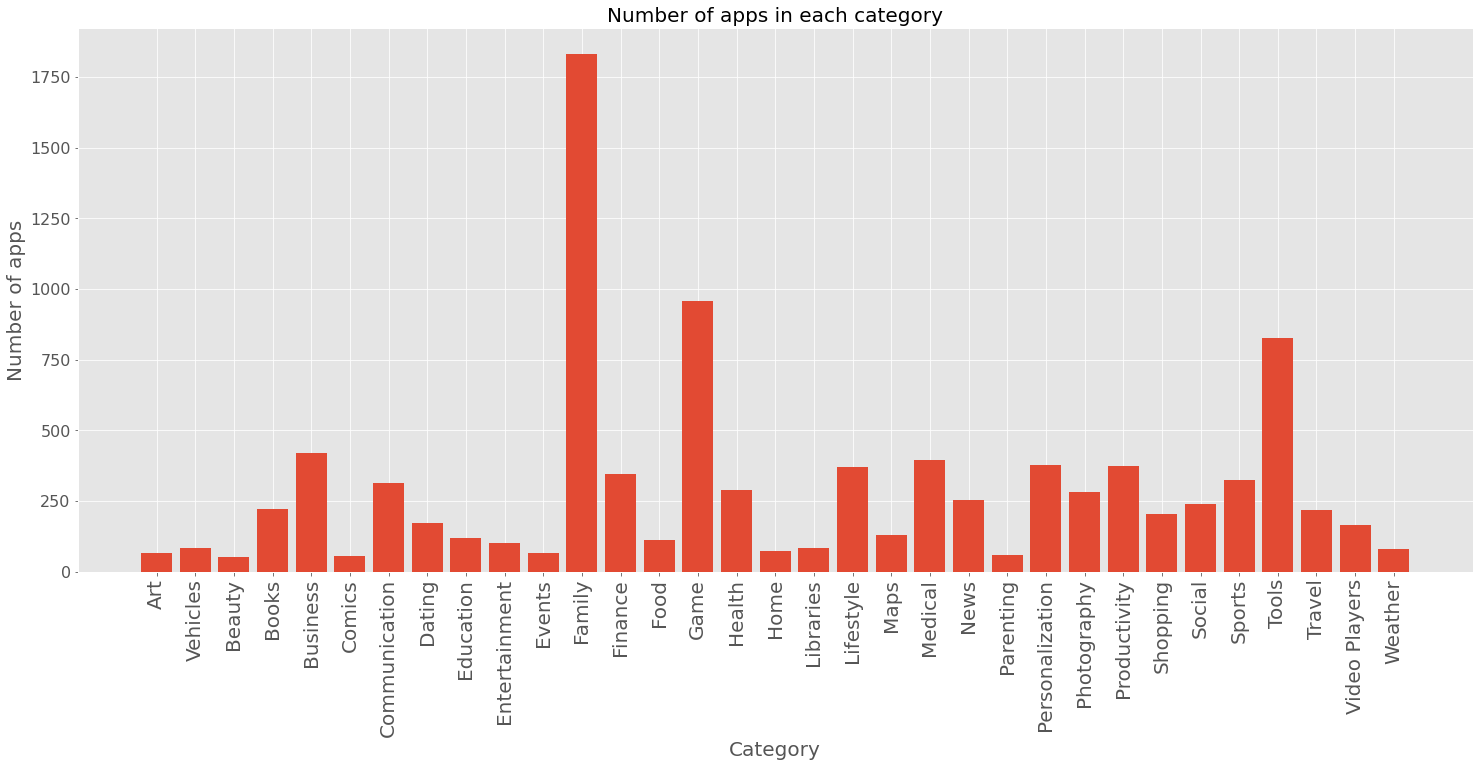

In [24]:
xticks = ["Art", "Vehicles", "Beauty", "Books", "Business", "Comics", "Communication", "Dating", "Education", "Entertainment", "Events", "Family", "Finance", "Food", "Game", "Health", "Home", "Libraries", "Lifestyle", "Maps", "Medical", "News", "Parenting", "Personalization", "Photography", "Productivity", "Shopping", "Social", "Sports", "Tools", "Travel", "Video Players", "Weather"]
num_categories = apps.Category.nunique()
print("Number of categories: {}".format(num_categories))
num_apps_in_category = apps.groupby("Category").size()
num_apps_in_category
fig, ax = plt.subplots(figsize=(25, 10))
ax.bar(num_apps_in_category.index, num_apps_in_category.values)
ax.set_xticklabels(xticks, fontsize=20, rotation = 90)
plt.yticks(fontsize = 16)
ax.set_title("Number of apps in each category", fontsize = 20)
ax.set_xlabel("Category", fontsize = 20)
ax.set_ylabel("Number of apps", fontsize = 20)
plt.show()

### Which categories people install apps from the most?

Here, we can see that people are most interested in `Communication` and `Video Player` categories, and not so much in `Medical` and `Beauty` Apps. 

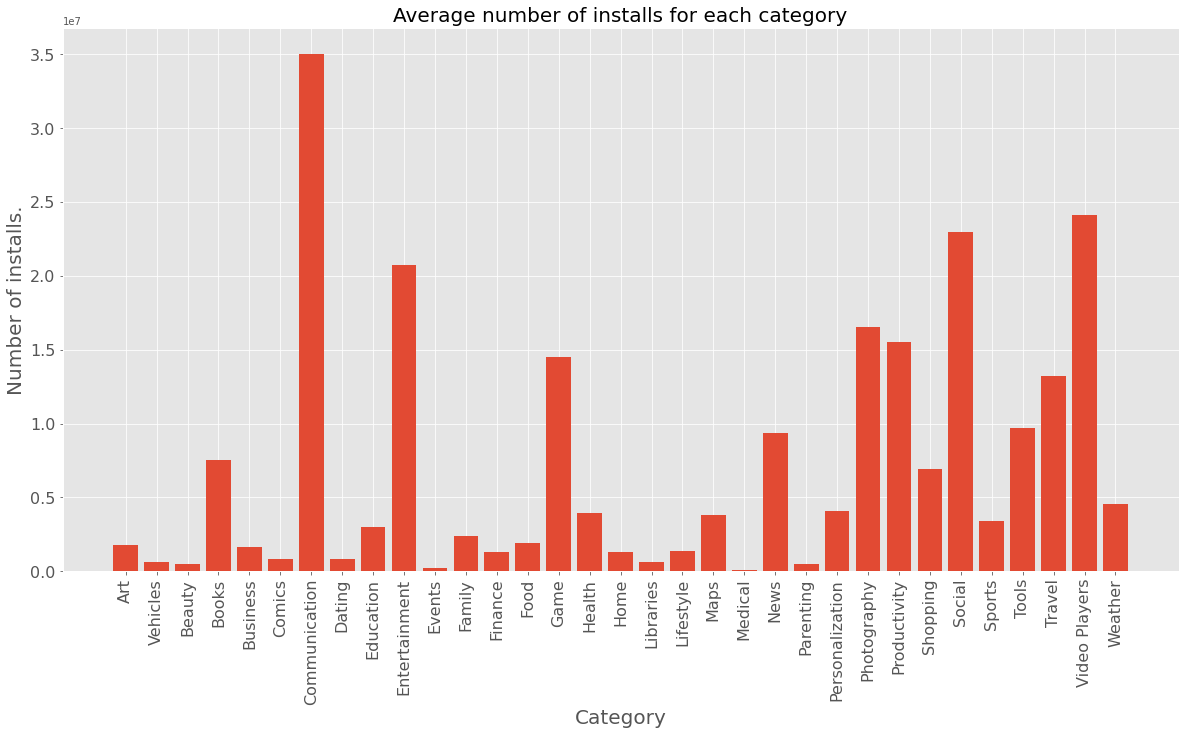

In [25]:
categories_mean = apps.groupby("Category").mean()
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(categories_mean.index, categories_mean.Installs)
ax.set_xticklabels(xticks, fontsize=16, rotation = 90)
plt.yticks(fontsize = 16)
ax.set_title("Average number of installs for each category", fontsize = 20)
ax.set_xlabel("Category", fontsize = 20)
ax.set_ylabel("Number of installs.", fontsize = 20)
plt.show()

### Which categories people love the most?

`Events` category comes at first with average rating of 4.4 while `Dating` category comes at last with a little under 2 average rating.

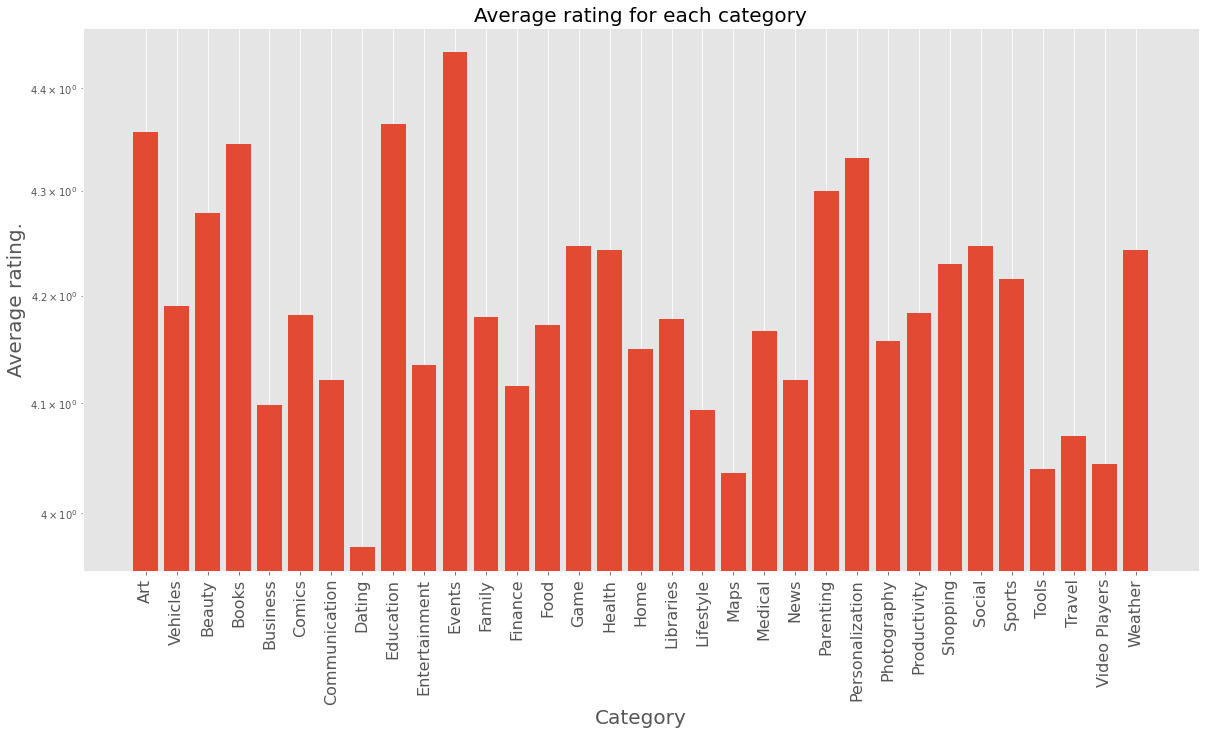

In [26]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.bar(xticks, categories_mean.Rating, log = True)
ax.set_xticklabels(xticks, fontsize=16, rotation = 90)
plt.yticks(fontsize = 25)
ax.set_title("Average rating for each category", fontsize = 20)
ax.set_xlabel("Category", fontsize = 20)
ax.set_ylabel("Average rating.", fontsize = 20)
plt.show()

### Distribution of rating.

Here we can see that most apps are rated around 4.5.

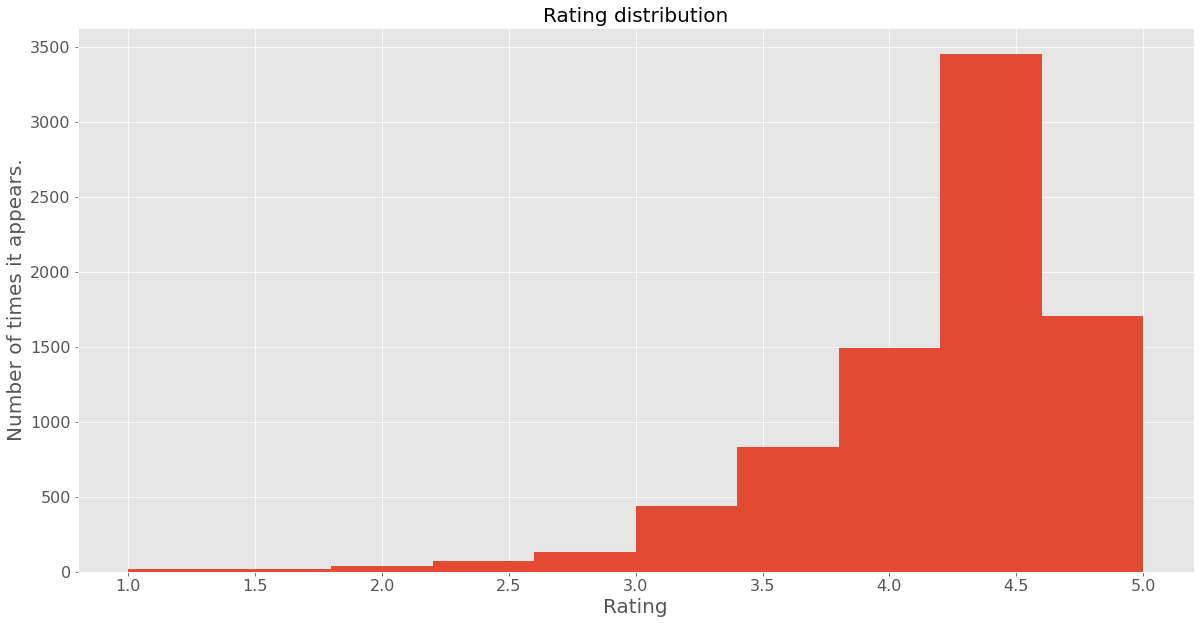

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(apps.Rating)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.set_title("Rating distribution", fontsize = 20)
ax.set_xlabel("Rating", fontsize = 20)
ax.set_ylabel("Number of times it appears.", fontsize = 20)

plt.show()

### Distribution of prices.

* For paid apps, most apps are priced under 50 dollars.
* Also, it shows that some apps are ridiculously over priced, around 400 dollars, those are called junk apps which developers upload for the sake of hoping someone would purchase them by mistake or people who are trying to show off buy them to prove how rich they are.

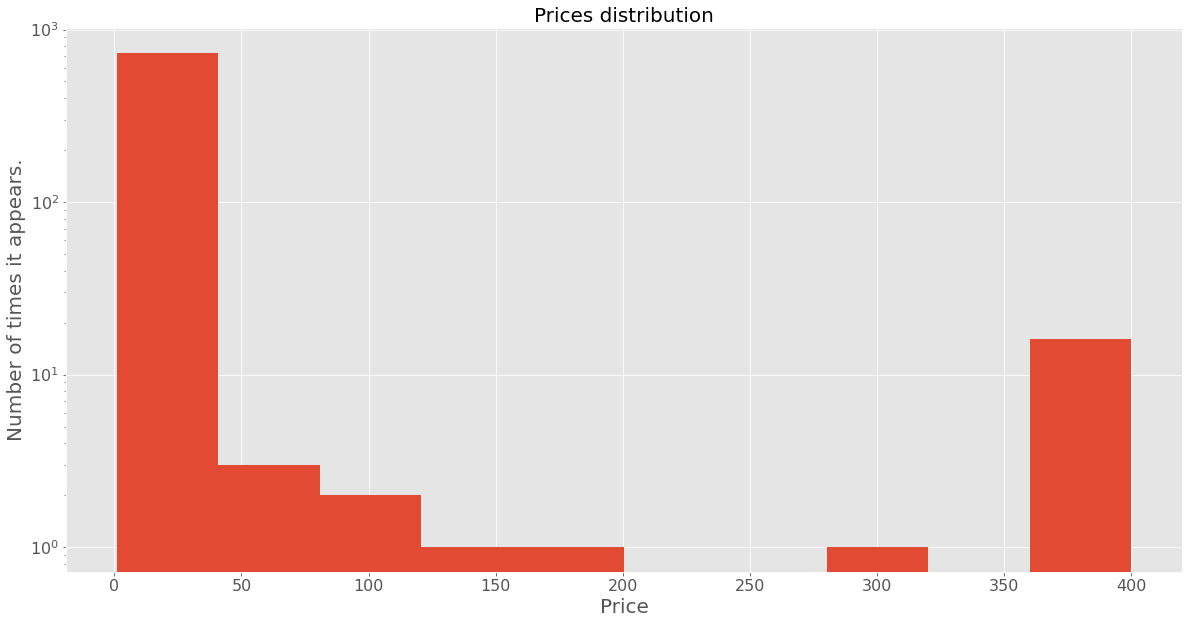

In [28]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(apps.query("Type == 'Paid'").Price, log = True)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.set_title("Prices distribution", fontsize = 20)
ax.set_xlabel("Price", fontsize = 20)
ax.set_ylabel("Number of times it appears.", fontsize = 20)

plt.show()

### Distribution of sizes

Shows here that most apps on the market are between 0-20MB.

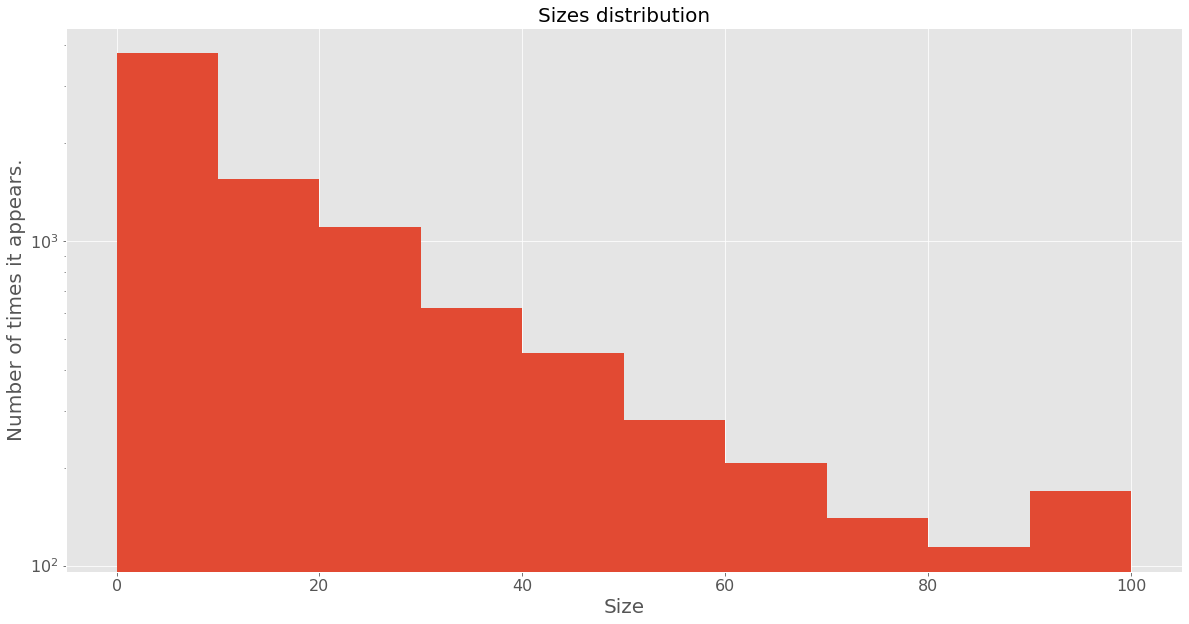

In [29]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.hist(apps.Size, log = True)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
ax.set_title("Sizes distribution", fontsize = 20)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Number of times it appears.", fontsize = 20)

plt.show()

### Does the size of an app affect wether people installs it or not?

Shows here that people most install apps that aren't very light-weight or heavy-weight, but average sized, around 70MB

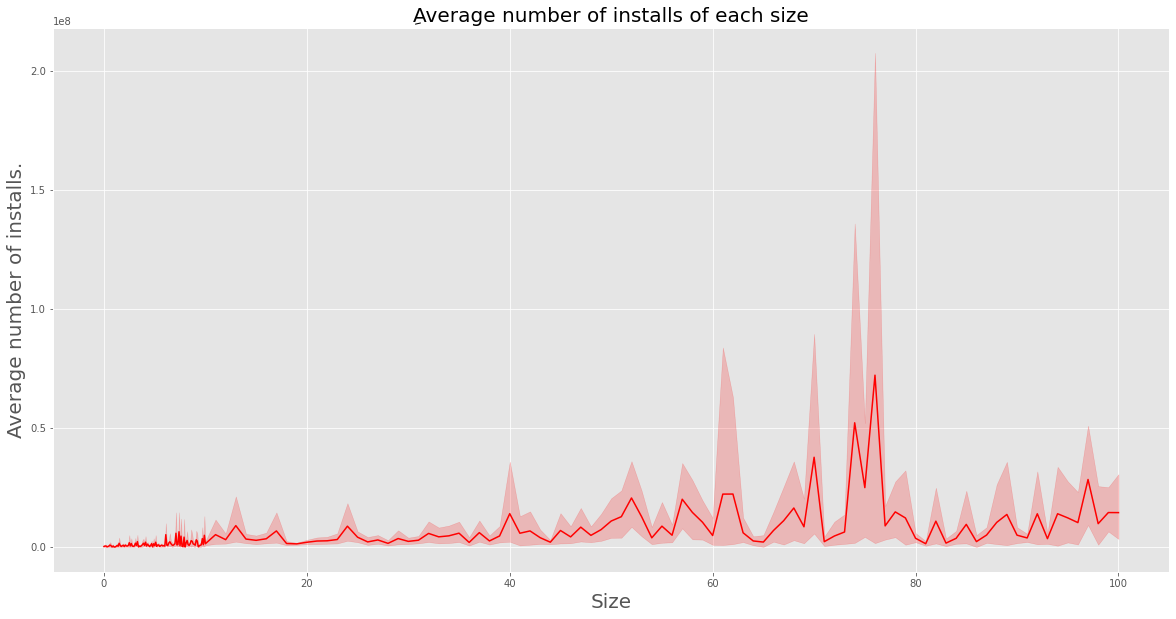

In [30]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "Size", y = "Installs", data = apps, color = "red", ax = ax)
ax.set_title("ِAverage number of installs of each size", fontsize = 20)
ax.set_xlabel("Size", fontsize = 20)
ax.set_ylabel("Average number of installs.", fontsize = 20)

plt.show()

### Does the size of an app affect its rating?

Apps under 20MB usually have the highest rating, while more bigges apps, not so much.

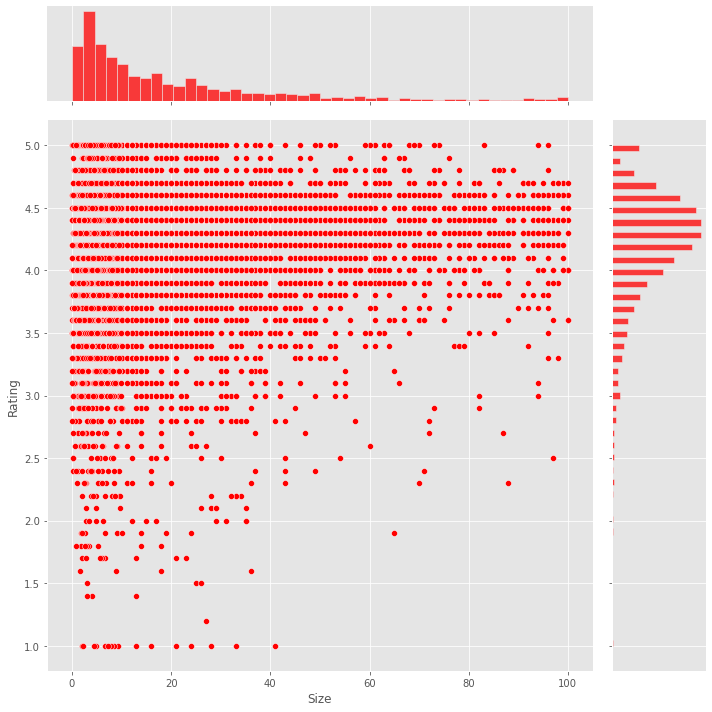

In [31]:
sns.jointplot(x = "Size", y = "Rating", data = apps, height = 10, color = "red")
plt.show()

### Does the price of paid app affects wether or not people buy them?

As expected, people tend to buy cheaper apps, mostly under 10 dollars.

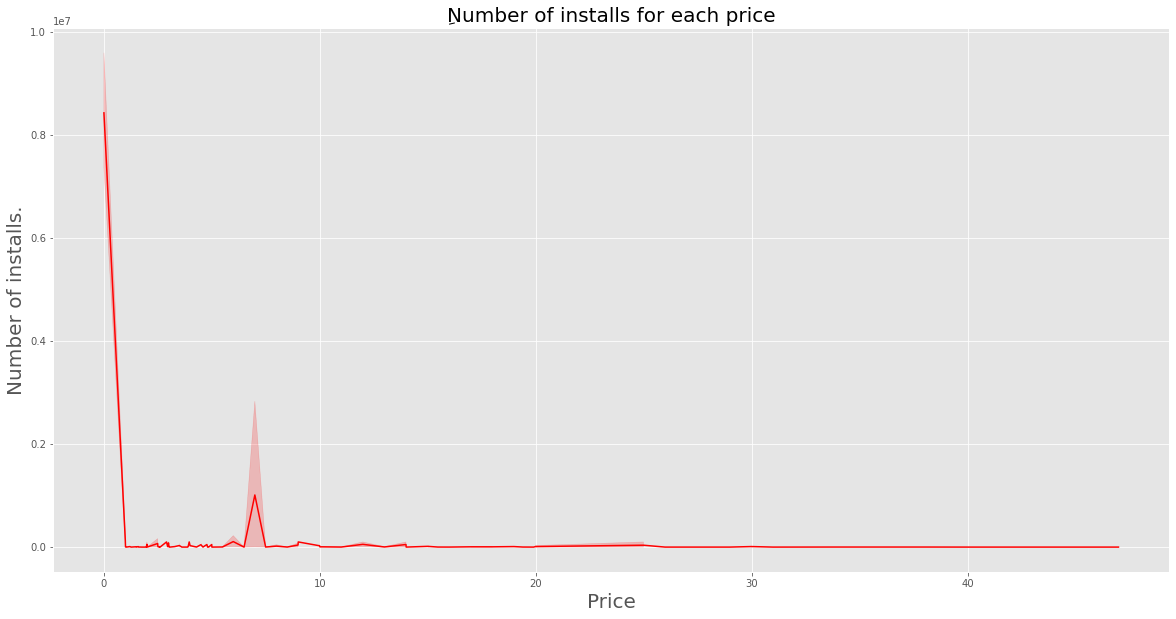

In [32]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.lineplot(x = "Price", y = "Installs", data = apps.query("Type == 'Paid'" and "Price < 50"), color = "red", ax = ax)
ax.set_title("ِNumber of installs for each price", fontsize = 20)
ax.set_xlabel("Price", fontsize = 20)
ax.set_ylabel("Number of installs.", fontsize = 20)
plt.show()

### Does the type of app (Free/Paid) affect its reviews?

* As shown, paid apps tend to have more positive reviews (or sentiment score), which reflects that paid apps usually have better quality.
* Also, as the outliers show, free apps tend to have overly negative reviews unlike paid apps.

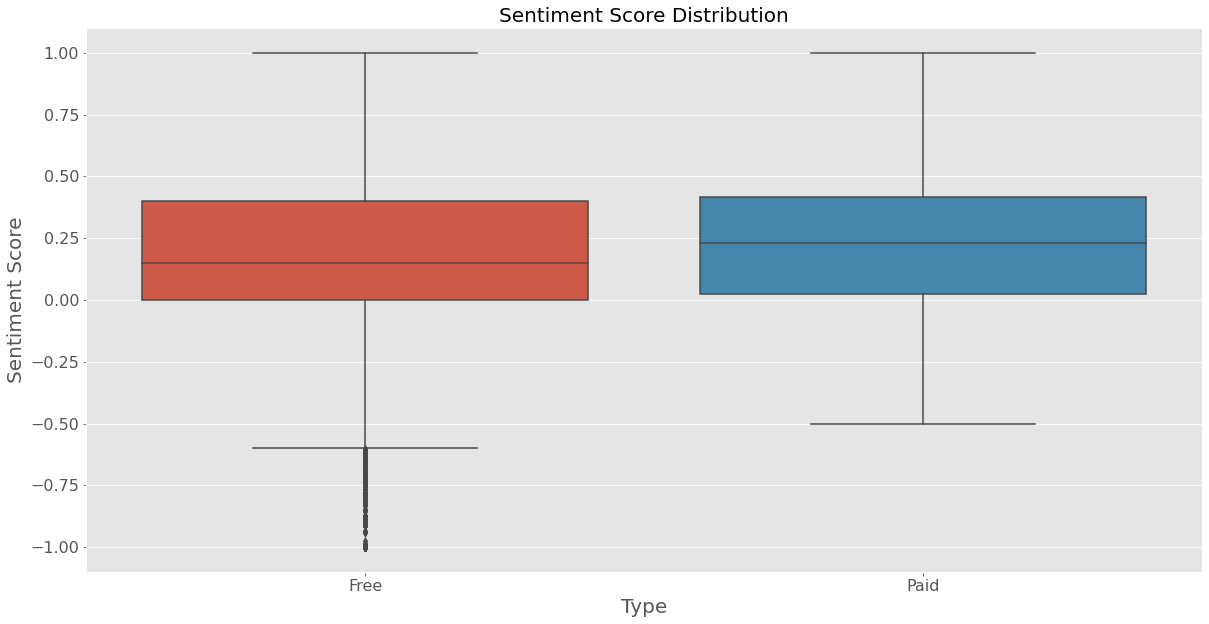

In [33]:
merged_df = pd.merge(apps, reviews, on = "App")
merged_df = merged_df.dropna(subset = ['Sentiment Score', 'Review'])
fig, ax = plt.subplots(figsize=(20, 10))
ax = sns.boxplot(x = 'Type', y = 'Sentiment Score', data = merged_df)
ax.set_title('Sentiment Score Distribution', size = 20)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.xlabel("Type", size = 20)
plt.ylabel("Sentiment Score", size = 20)

plt.show()